<a href="https://colab.research.google.com/github/suryasaysso/my-projects/blob/surya_repository/PROJECTSEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING THE DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from matplotlib.colors import ListedColormap
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score

                                 Keyword  Search_Volume  ...  Oppurtunity_Score  Use
0          11children shoes office shoes            0.0  ...                  0   NO
1                  361 shoes white shoes            0.0  ...                  1   NO
2    a6 shoes running shoes white colour            0.0  ...                  2   NO
3               aces shoes running shoes            0.0  ...                  3  YES
4             action shoes for men shoes            0.0  ...                  2   NO
..                                   ...            ...  ...                ...  ...
495             vogue shoes running shoe            NaN  ...                  1   NO
496        volleyball shoes sports shoes            NaN  ...                  5  YES
497                      wildcraft shoes            NaN  ...                  1   NO
498         woodland shoes running shoes            NaN  ...                  3  YES
499            xpert shoes running shoes            NaN  ...     

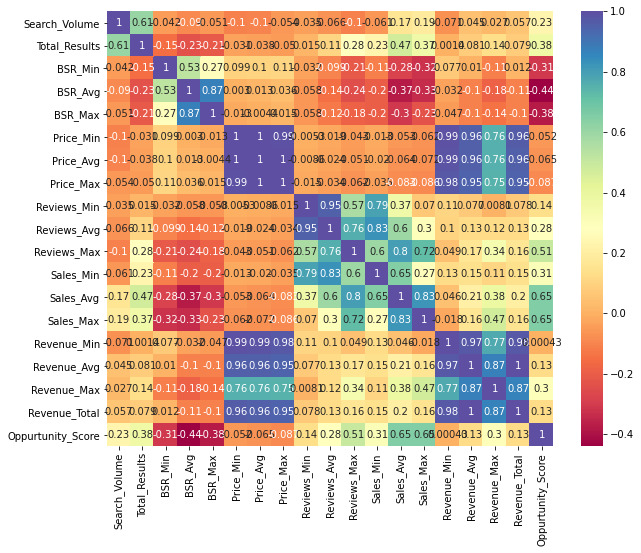

                                 Keyword  BSR_Avg  ...  Oppurtunity_Score  Use
0          11children shoes office shoes  22576.0  ...                  0   NO
1                  361 shoes white shoes  65120.0  ...                  1   NO
2    a6 shoes running shoes white colour  84810.0  ...                  2   NO
3               aces shoes running shoes  65085.0  ...                  3  YES
4             action shoes for men shoes   5301.0  ...                  2   NO
..                                   ...      ...  ...                ...  ...
495             vogue shoes running shoe  14378.0  ...                  1   NO
496        volleyball shoes sports shoes    376.0  ...                  5  YES
497                      wildcraft shoes  45140.0  ...                  1   NO
498         woodland shoes running shoes  14021.0  ...                  3  YES
499            xpert shoes running shoes   2554.0  ...                  5  YES

[500 rows x 8 columns]


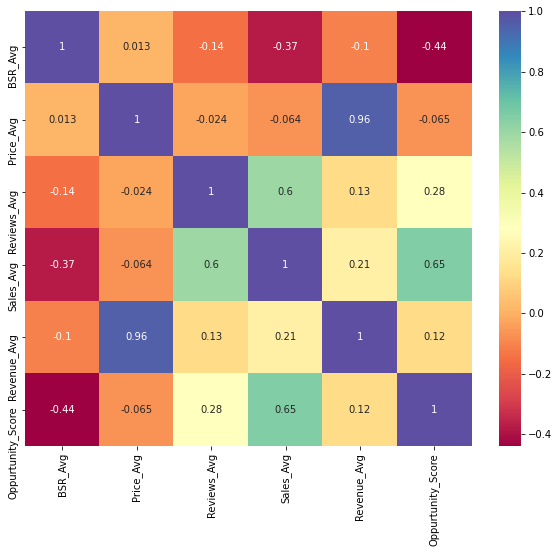


			COUNTPLOT	


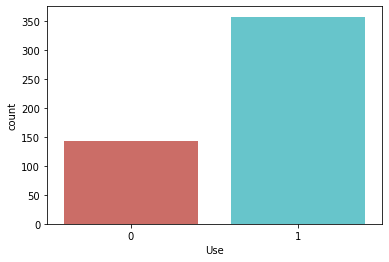


NUMBER OF YES AND NO
1    357
0    143
Name: Use, dtype: int64


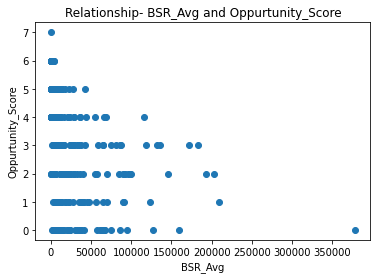

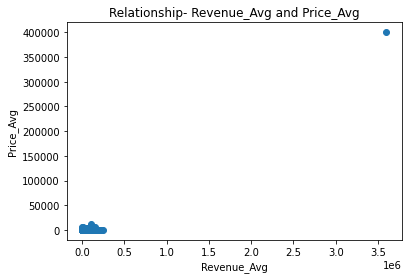

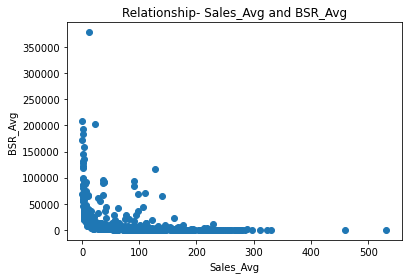

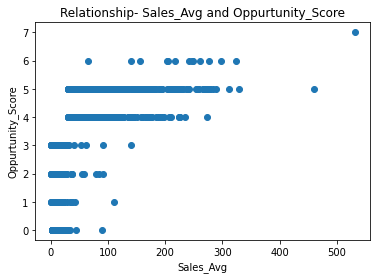

In [ ]:
#DATAPREPROCESSING AND EDA
from sklearn import preprocessing 
dataframe=pd.read_csv("/content/shoesseodataset.csv")
print(dataframe)
fig,axes = plt.subplots(figsize=(10,8))
correl = dataframe.corr()
sns.heatmap(dataframe.corr(),cmap='Spectral',annot=True,ax=axes)
x = dataframe.drop(columns=['Oppurtunity_Score']).values
y = dataframe['Oppurtunity_Score'].values
plt.show()
dataframe.drop(dataframe.columns[[1,2,3,5,6,8,9,11,12,14,15,17,18]], axis = 1, inplace = True) 
dataframe['BSR_Avg'].fillna(value=dataframe['BSR_Avg'].mean(), inplace=True)
dataframe['Price_Avg'].fillna(value=dataframe['Price_Avg'].mean(), inplace=True)
dataframe['Reviews_Avg'].fillna(value=dataframe['Reviews_Avg'].mean(), inplace=True)
dataframe['Sales_Avg'].fillna(value=dataframe['Sales_Avg'].mean(), inplace=True)
dataframe['Revenue_Avg'].fillna(value=dataframe['Revenue_Avg'].mean(), inplace=True)
print(dataframe)
fig,axes = plt.subplots(figsize=(10,8))
correl = dataframe.corr()
sns.heatmap(dataframe.corr(),cmap='Spectral',annot=True,ax=axes)
x = dataframe.drop(columns=['Oppurtunity_Score']).values
y = dataframe['Oppurtunity_Score'].values
plt.show()
dataframe=dataframe.replace(to_replace ="NO", value =0)
dataframe=dataframe.replace(to_replace ="YES", value =1)
print("\n\t\t\tCOUNTPLOT\t")
sns.countplot(x="Use",data=dataframe,palette="hls")
plt.show()
print("\nNUMBER OF YES AND NO")
print(dataframe["Use"].value_counts())
pd.set_option('display.max_colwidth',1000)
X = dataframe.iloc[:,1:-1 ].values
y = dataframe.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19,stratify=y)
#FEATURE SCALING AND IMPLEMENTING THE KNN ALGORITHM
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from matplotlib import pyplot
pyplot.scatter(dataframe.BSR_Avg, dataframe.Oppurtunity_Score)
pyplot.title("Relationship- BSR_Avg and Oppurtunity_Score")
pyplot.xlabel("BSR_Avg")
pyplot.ylabel("Oppurtunity_Score")
pyplot.show()
pyplot.scatter(dataframe.Revenue_Avg, dataframe.Price_Avg)
pyplot.title("Relationship- Revenue_Avg and Price_Avg")
pyplot.xlabel("Revenue_Avg")
pyplot.ylabel("Price_Avg")
pyplot.show()
pyplot.scatter(dataframe.Sales_Avg, dataframe.BSR_Avg)
pyplot.title("Relationship- Sales_Avg and BSR_Avg")
pyplot.xlabel("Sales_Avg")
pyplot.ylabel("BSR_Avg")
pyplot.show()
pyplot.scatter(dataframe.Sales_Avg, dataframe.Oppurtunity_Score)
pyplot.title("Relationship- Sales_Avg and Oppurtunity_Score")
pyplot.xlabel("Sales_Avg")
pyplot.ylabel("Oppurtunity_Score")
pyplot.show()

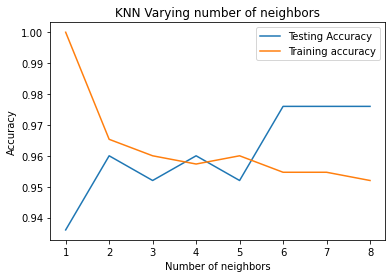

Accuracy 97.6 

PREDICTED   0   1  All
ACTUAL                
0          36   0   36
1           3  86   89
All        39  86  125

CONFUSION MATRIX
[[36  0]
 [ 3 86]]

Classification Report:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.97      0.98        89

    accuracy                           0.98       125
   macro avg       0.96      0.98      0.97       125
weighted avg       0.98      0.98      0.98       125


Model Accuracy: 97.6
Training data Accuracy: 95.46666666666667
Testing data Accuracy: 97.6


In [ ]:
#KNN MODEL FITTING AND IMPLEMENTATION
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#Compute accuracy 
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
#GRAPH
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print("Accuracy", knn.score(X_test,y_test)*100,"\n")
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'], margins=True))
print("\nCONFUSION MATRIX")
print(confusion_matrix)
#PREDICTION AND CLASSIFICATION REPORT
y_pred = classifier.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#print("[ 'PREDICTED DECISION' 'ACTUAL DECISION' ]")
#print(yp)
creport = (classification_report(y_test, y_pred))
print('\nClassification Report:\n\n',creport)
print('\nModel Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", classifier.score(X_train, y_train)*100)
print("Testing data Accuracy:", classifier.score(X_test, y_test)*100)


In [ ]:
#Model Optimization(Hyper Parameter Tuning Using Randomized Search Cross Validation)
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(2,11,step=1),'metric':['minkowski','manhattan','euclidean']}
random_search = RandomizedSearchCV(knn,params,scoring='precision',cv=10)
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
random_search.fit(X_train,y_train)
print("RANDOM SEARCH RESULTS \n\n")
print("Best Params : ",random_search.best_params_)
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)
print("Best Model: \n",random_search.best_estimator_)
tuned_model = random_search.best_estimator_

RANDOM SEARCH RESULTS 


Best Params :  {'n_neighbors': 4, 'metric': 'euclidean'}
Best Precision :  0.9778461538461538
Best Recall :  0.976
Best f1_score :  0.9762742857142857
Best Model: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Optimization terminated successfully.
         Current function value: 0.210412
         Iterations 10
Confusion Matrix : 
 [[28  8]
 [ 2 87]]

Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.92      0.98      0.95        89

    accuracy                           0.92       125
   macro avg       0.92      0.88      0.90       125
weighted avg       0.92      0.92      0.92       125



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


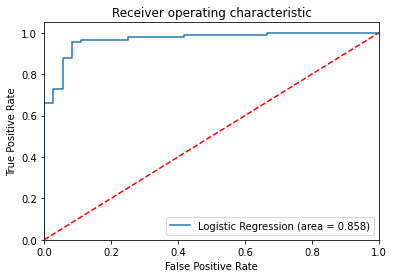

CLASSIFICATION REPORT OPTIMIZATION RESULTS 


Best Precision :  0.9208421052631579
Best Recall :  0.92
Best f1_score :  0.9176679841897234


In [ ]:
#LOGISTIC REGRESSINO MODEL FITTING AND IMPLEMENTATION
import statsmodels.api as sm
import pandas.util.testing as tm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19,stratify=y)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary2())
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(solver='liblinear', random_state=24) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", confusion_matrix)
#PREDICTION AND CLASSIFICATION REPORT
y_pred = classifier.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
creport = (classification_report(y_test, y_pred))
print('\nClassification Report:\n\n',creport)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#ROC_AUC_GRAPH
import sklearn.linear_model as sk
logreg = sk.LogisticRegressionCV()
logreg.fit(X_train,y_train)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#LOGISTIC REGRESSION OPTIMIZED RESULTS
logistic_reg = LogisticRegression(solver='liblinear', random_state=19)
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n\n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

In [ ]:
#NAIVE BAYES MODEL FITTING AND IMPLEMENTATION
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_test)
yp = (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
confmat = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix:\n\n",confmat)
creport = (classification_report(y_test, y_pred))
print('\nClassification Report:\n\n',creport)
print('Model Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", classifier.score(X_train, y_train)*100)
print("Testing data Accuracy:", classifier.score(X_test, y_test)*100)
#NAIVE BAYES CLASSIFIER - OPTIMIZED RESULTS
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n\n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)


Confusion matrix:

 [[34  2]
 [11 78]]

Classification Report:

               precision    recall  f1-score   support

           0       0.76      0.94      0.84        36
           1       0.97      0.88      0.92        89

    accuracy                           0.90       125
   macro avg       0.87      0.91      0.88       125
weighted avg       0.91      0.90      0.90       125

Model Accuracy: 89.60000000000001
Training data Accuracy: 88.8
Testing data Accuracy: 92.0
CLASSIFICATION REPORT OPTIMIZATION RESULTS 


Best Precision :  0.9117999999999999
Best Recall :  0.896
Best f1_score :  0.8990085470085472




Classification Report

               precision    recall  f1-score   support

           0       0.93      0.75      0.83        36
           1       0.91      0.98      0.94        89

    accuracy                           0.91       125
   macro avg       0.92      0.86      0.89       125
weighted avg       0.91      0.91      0.91       125



Confusion Matrix
 [[27  9]
 [ 2 87]]

Model Accuracy: 91.2
Training data Accuracy: 100.0
Testing data Accuracy: 91.2


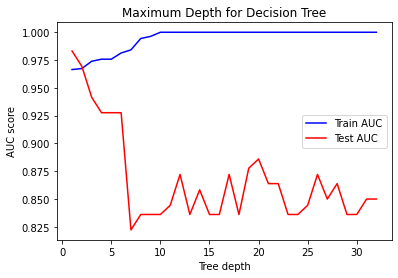

CLASSIFICATION REPORT OPTIMIZATION RESULTS 


Best Precision :  0.9060265095729013
Best Recall :  0.904
Best f1_score :  0.9000645161290323


In [ ]:
#DECISION TREE CLASSIFIER MODEL IMPLEMENTATION AND FITTING
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 19)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print('\n\nClassification Report\n\n', classification_report(y_test, y_pred))
print('\n\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nModel Accuracy:', accuracy_score(y_test, y_pred)*100)
print("Training data Accuracy:", classifier.score(X_train, y_train)*100)
print("Testing data Accuracy:", classifier.score(X_test, y_test)*100)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=max_depth)
  dt.fit(X_train, y_train)
  train_pred = dt.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous test results
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.title("Maximum Depth for Decision Tree")
plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
#DECISION TREE CLASSIFIER - OPTIMIZED RESULTS
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n\n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)

In [ ]:
#RANDOM FOREST CLASSIFIER MODEL IMPLEMENTATION AND FITTING
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 19)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
print('\n\nClassification Report\n\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Model Accuracy', accuracy_score(y_test, y_pred)*100)
print("Training Accuracy", classifier.score(X_train, y_train)*100)
print("Testing Accuracy", classifier.score(X_test, y_test)*100)
#RANDOM FOREST CLASSIFIER - OPTIMIZED RESULT
precision_average = precision_score(y_test, y_pred, average="weighted", pos_label=1)
recall_average = recall_score(y_test, y_pred, average="weighted", pos_label=1)
f1_score_average = f1_score(y_test,y_pred,average="weighted",pos_label=1)
print("CLASSIFICATION REPORT OPTIMIZATION RESULTS \n\n")
print("Best Precision : ",precision_average)
print("Best Recall : ", recall_average)
print("Best f1_score : ",f1_score_average)



Classification Report

               precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.98      0.97      0.97        89

    accuracy                           0.96       125
   macro avg       0.95      0.96      0.95       125
weighted avg       0.96      0.96      0.96       125


Confusion Matrix
 [[34  2]
 [ 3 86]]
Model Accuracy 96.0
Training Accuracy 99.73333333333333
Testing Accuracy 96.0
CLASSIFICATION REPORT OPTIMIZATION RESULTS 


Best Precision :  0.9604668304668306
Best Recall :  0.96
Best f1_score :  0.9601609782524573


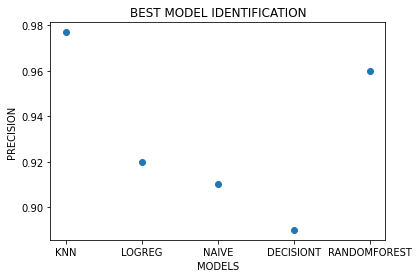

In [ ]:
#BEST MODEL IDENTIFICATION
models=("KNN","LOGREG","NAIVE","DECISIONT","RANDOMFOREST")
precisionformodels=(0.977,0.92,0.91,0.89,0.96)
pyplot.scatter(models,precisionformodels)
pyplot.title("BEST MODEL IDENTIFICATION")
pyplot.xlabel("MODELS")
pyplot.ylabel("PRECISION")
pyplot.show()